### Bertopic

In [ ]:
import sys

!{sys.executable} -m pip install bertopic gensim joblib pandas numpy  matplotlib

Đang tải dữ liệu (texts)...


2025-10-22 13:59:03,251 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Đang tải embeddings đã huấn luyện sẵn từ: vietnamese_sbert_embeddings.npy
Đang khởi tạo các mô hình con...
Bắt đầu huấn luyện BERTopic với min_size=220 và n_neighbors=30...


2025-10-22 13:59:17,476 - BERTopic - Dimensionality - Completed ✓
2025-10-22 13:59:17,479 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-10-22 13:59:17,879 - BERTopic - Cluster - Completed ✓
2025-10-22 13:59:17,884 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-10-22 13:59:20,259 - BERTopic - Representation - Completed ✓
2025-10-22 13:59:21,317 - BERTopic - WARNING: You are saving a BERTopic model without explicitly defining an embedding model.If you are using a sentence-transformers model or a HuggingFace model supportedby sentence-transformers, please save the model by using a pointer towards that model.For example, `save_embedding_model='sentence-transformers/all-mpnet-base-v2'`


Hoàn thành huấn luyện.
Mô hình tìm thấy 11 chủ đề.
ĐÃ LƯU MÔ HÌNH (Bản 'nhẹ') TẠI: bertopic_LIGHT_s220_n30
 HOÀN THÀNH CELL 2 (PHẦN LƯU) 

== ĐANG TÍNH TOÁN COHERENCE (C_V) ==
Chuẩn bị tokens, dictionary, corpus...
Bắt đầu tính C_v (có thể mất vài phút)...

---> ĐIỂM COHERENCE (C_V): 0.7324 <---

== 1. PHÂN TÍCH CHI TIẾT CÁC CHỦ ĐỀ ==

--- Topic 0 (Số lượng: 1239) ---
Top 10 Từ: phim, việt_nam, ảnh, khán_giả, đi, diễn_viên, du_lịch, văn_hóa, du_khách, chia_sẻ


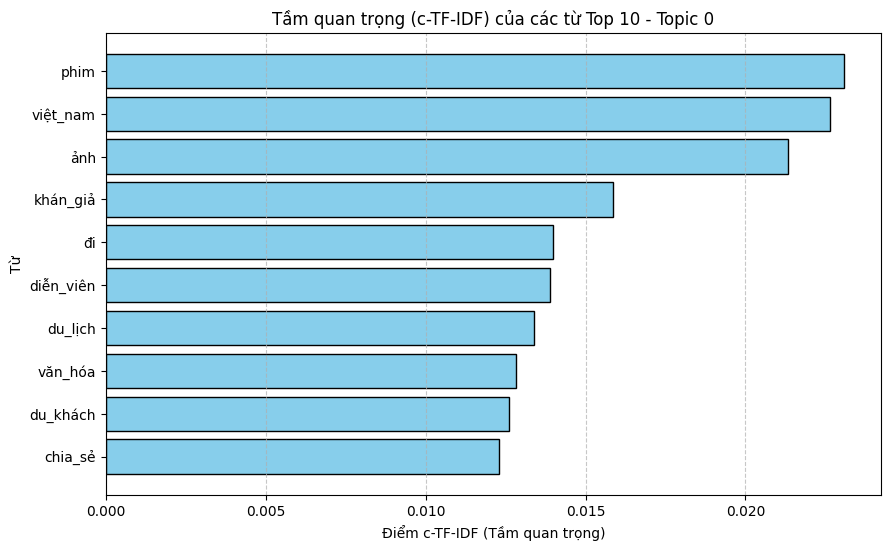


--- Topic 1 (Số lượng: 894) ---
Top 10 Từ: công_an, xe, hành_vi, vụ, quy_định, bị_cáo, tiền, tài_xế, án, đồng


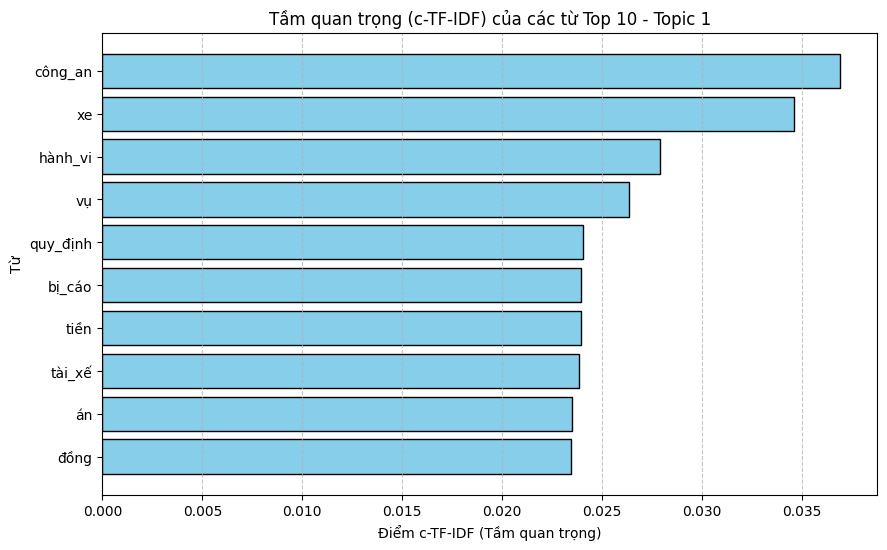


--- Topic 2 (Số lượng: 695) ---
Top 10 Từ: trường, đại_học, học_sinh, học, giáo_dục, thi, giáo_viên, sách, ngành, sinh_viên


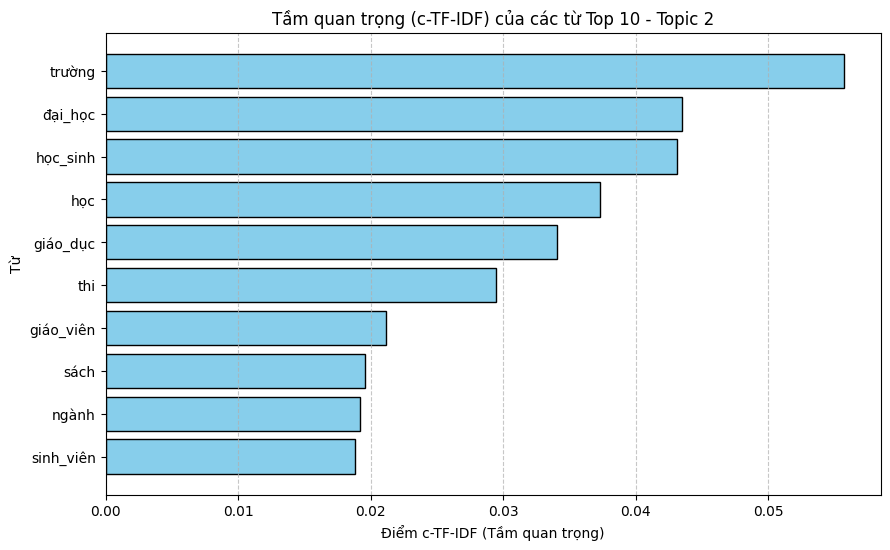


--- Topic 3 (Số lượng: 598) ---
Top 10 Từ: ung_thư, bệnh, bệnh_nhân, bệnh_viện, điều_trị, có_thể, bác_sĩ, y_tế, giúp, phẫu_thuật


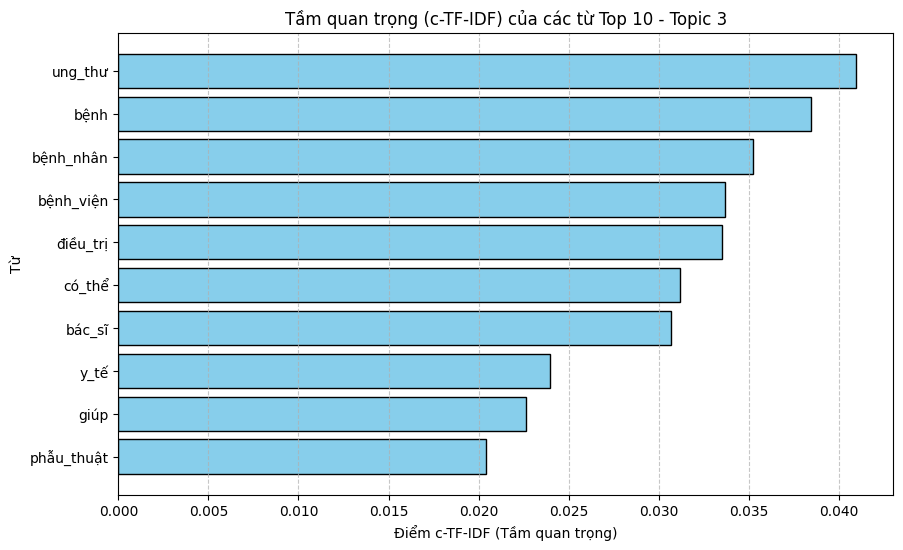


--- Topic 4 (Số lượng: 582) ---
Top 10 Từ: chồng, vợ, mẹ, đi, gái, hai, câu_chuyện, trai, gia_đình, hôn_nhân


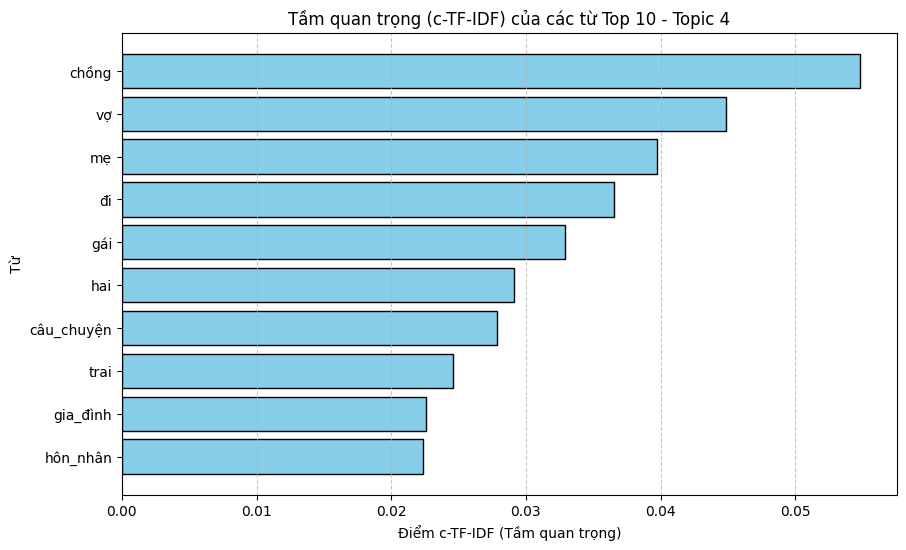


--- Topic 5 (Số lượng: 509) ---
Top 10 Từ: đất, mưa, xã, sông, người_dân, bão, lũ, tỉnh, khu_vực, ngập


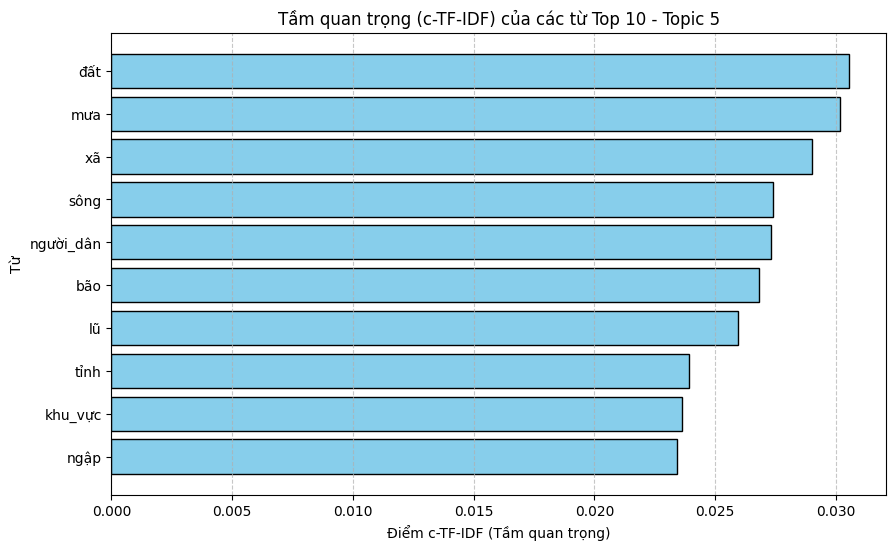


--- Topic 6 (Số lượng: 502) ---
Top 10 Từ: đấu, giải, trận, đội_tuyển, thi_đấu, cầu_thủ, malaysia, giành, đội, vđv


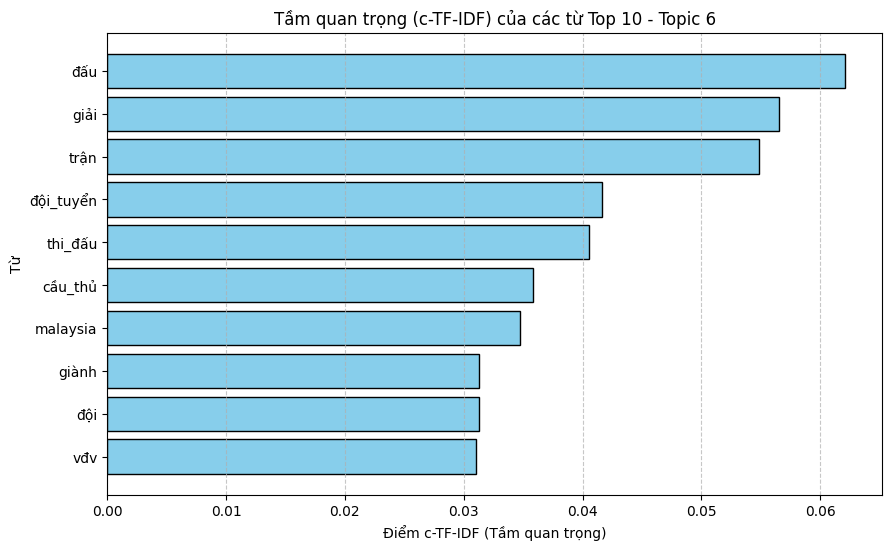


--- Topic 7 (Số lượng: 441) ---
Top 10 Từ: doanh_nghiệp, phát_triển, việt_nam, esg, kinh_tế, đại_hội, tỉnh, tổ_chức, xây_dựng, bền_vững


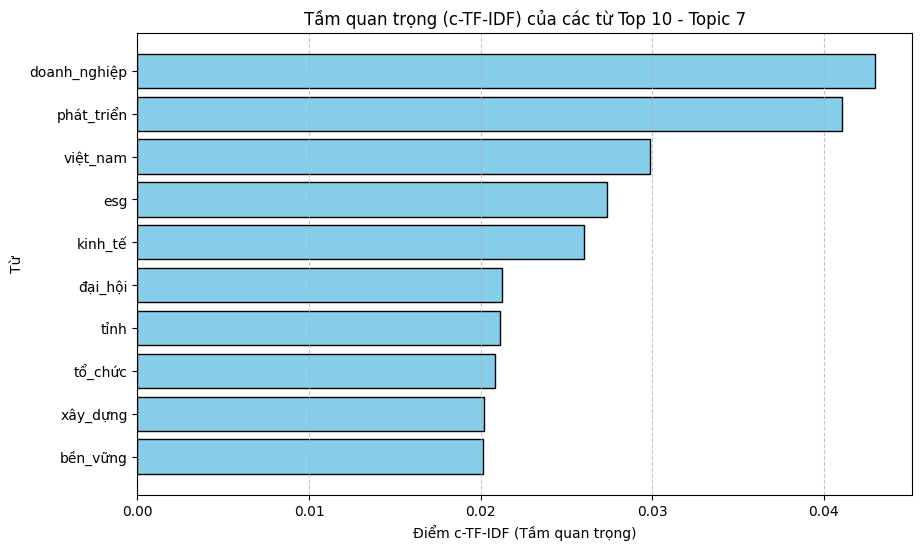


--- Topic 8 (Số lượng: 375) ---
Top 10 Từ: xe, mẫu, đồng, triệu, sạc, phiên_bản, giá, hãng, vinfast, trang_bị


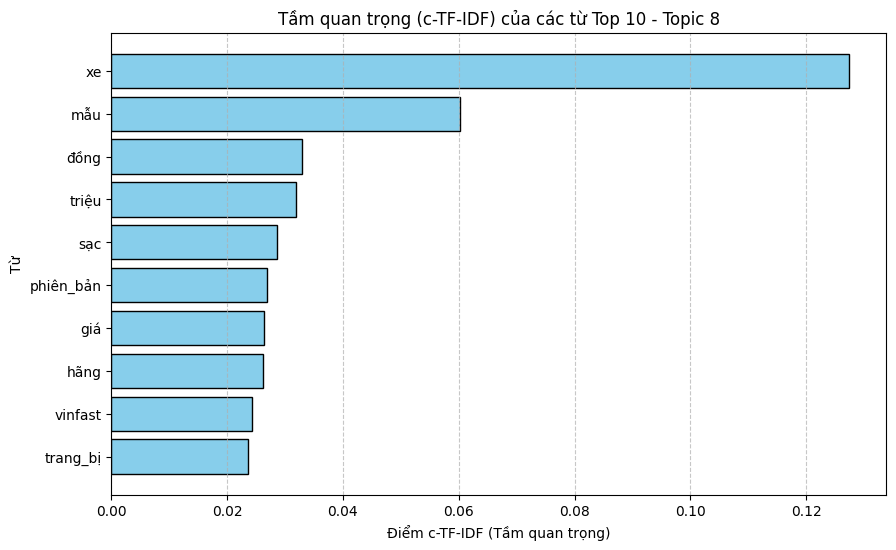


--- Topic 9 (Số lượng: 337) ---
Top 10 Từ: lao_động, công_ty, làm_việc, việc_làm, công_việc, hưởng, lương, doanh_nghiệp, trợ_cấp, đóng


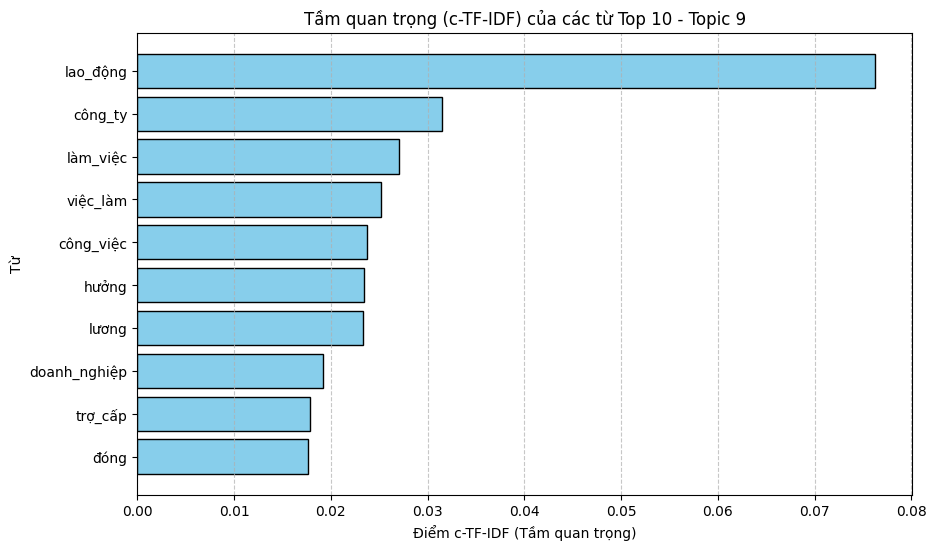


--- Topic 10 (Số lượng: 287) ---
Top 10 Từ: nga, ukraine, tổng_thống, trump, tên_lửa, tấn_công, uav, mỹ, moscow, lực_lượng


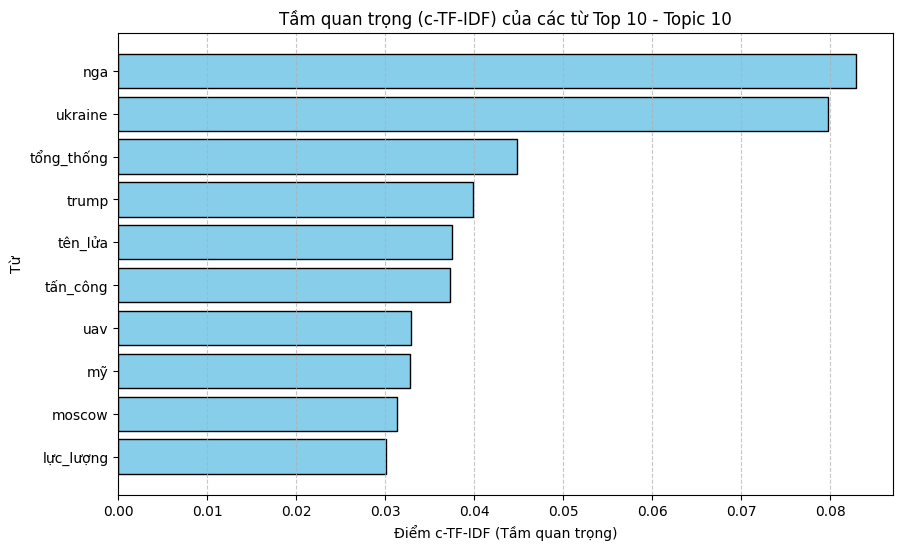


== 2. PHÂN BỔ BÀI VIẾT TRÊN TOÀN BỘ CÁC CHỦ ĐỀ ==


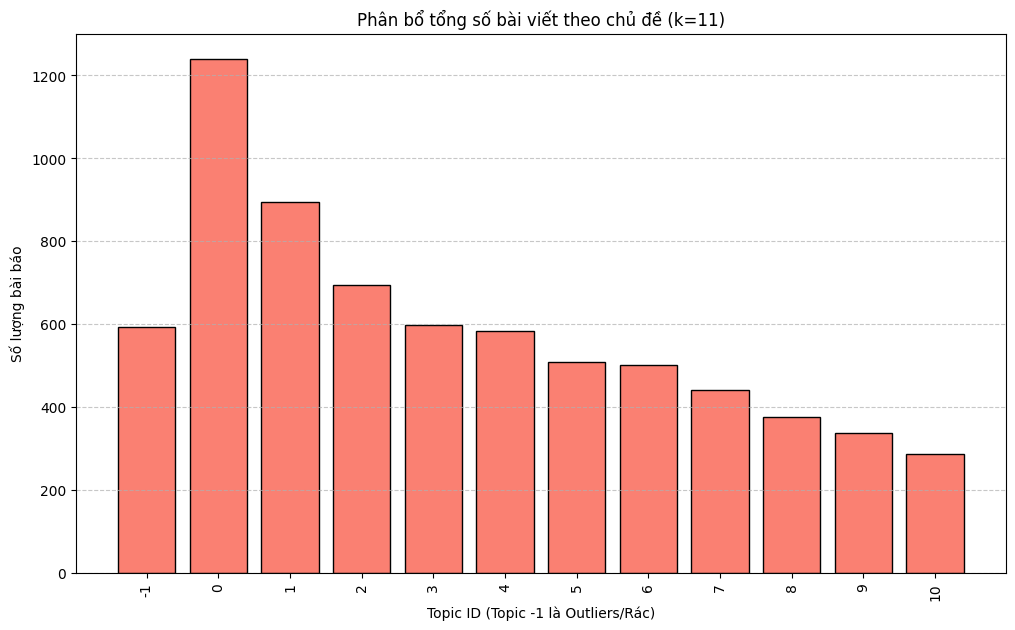

Tổng số tài liệu: 7052
Số lượng tài liệu là 'Outliers' (Topic -1): 593
Số lượng tài liệu được gán chủ đề: 6459


In [ ]:
#################################################################
# CELL 2: HUẤN LUYỆN, LƯU VÀ TRỰC QUAN HÓA
#################################################################
import pandas as pd
import numpy as np
from bertopic import BERTopic
from umap import UMAP
from hdbscan import HDBSCAN
# (Không cần BM25)
import joblib 
import matplotlib.pyplot as plt

# --- 1. Cài đặt (!!! QUAN TRỌNG !!!) ---
# (Đây là các tham số "tốt nhất" mà bạn đã sweep và chọn)
BEST_MIN_SIZE = 220   # Thay đổi số này (ví dụ: 80, 100, 120...)
N_NEIGHBORS = 30   # Thay đổi số này (ví dụ: 10, 15, 20...)

# Đường dẫn
DF_PATH = "dantri_qc_grouped.csv"
# Đường dẫn đến file .npy (đã tạo ở Cell 1)
EMB_PATH = "vietnamese_sbert_embeddings.npy"
# Tên file lưu (bản "nhẹ")
MODEL_SAVE_PATH = f"bertopic_LIGHT_s{BEST_MIN_SIZE}_n{N_NEIGHBORS}"

# --- 2. Tải Dữ liệu và Embeddings ---
print("Đang tải dữ liệu (texts)...")
df = pd.read_csv(DF_PATH)
texts = df["clean_text"].astype(str).tolist()

# ĐỌC EMBEDDING ĐÃ HUẤN LUYỆN SẴN
print(f"Đang tải embeddings đã huấn luyện sẵn từ: {EMB_PATH}")
embeddings = np.load(EMB_PATH)

# --- 3. Khởi tạo các mô hình con (Umap, Hdbscan) ---
print("Đang khởi tạo các mô hình con...")
umap_model = UMAP(
    n_neighbors=N_NEIGHBORS,
    n_components=5,
    min_dist=0.0,
    metric='cosine',
    random_state=42
)

hdbscan_model = HDBSCAN(
    min_cluster_size=BEST_MIN_SIZE,
    metric='euclidean',
    cluster_selection_method='eom',
    prediction_data=True,
    min_samples=10
)

# --- 4. Huấn luyện BERTopic ---
print(f"Bắt đầu huấn luyện BERTopic với min_size={BEST_MIN_SIZE} và n_neighbors={N_NEIGHBORS}...")
topic_model = BERTopic(
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    verbose=True,
    language="multilingual",
    calculate_probabilities=True
)

# HUẤN LUYỆN BẰNG FILE .NPY CÓ SẴN (RẤT NHANH)
topics, probabilities = topic_model.fit_transform(texts, embeddings=embeddings)
print("Hoàn thành huấn luyện.")
k_found = len(topic_model.get_topic_info()) - 1
print(f"Mô hình tìm thấy {k_found} chủ đề.")

# --- 5. Lưu Mô hình (Bản "nhẹ" - "Lưu mô hình không") ---
topic_model.save(
    MODEL_SAVE_PATH,
    serialization="safetensors",
    save_embedding_model=False 
)
print(f"ĐÃ LƯU MÔ HÌNH (Bản 'nhẹ') TẠI: {MODEL_SAVE_PATH}")
print(" HOÀN THÀNH CELL 2 (PHẦN LƯU) ")


#################################################################
# PHẦN TÍNH COHERENCE C_V (BẠN ĐÃ QUÊN THÊM)
#################################################################
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary

print("\n========================================")
print("== ĐANG TÍNH TOÁN COHERENCE (C_V) ==")
print("========================================")

# 1. Chuẩn bị dữ liệu cho Gensim
print("Chuẩn bị tokens, dictionary, corpus...")
tokens = [t.split() for t in texts]
dictionary = Dictionary(tokens)
corpus = [dictionary.doc2bow(doc) for doc in tokens]

# 2. Lấy các từ hàng đầu từ BERTopic
topic_words = []
for topic_id in sorted(topic_model.get_topics().keys()):
    if topic_id == -1:
        continue  # Bỏ qua topic outliers
    
    words = [word for word, _ in topic_model.get_topic(topic_id)]
    
    # Kiểm tra chủ đề rỗng (để không bị lỗi)
    if words: 
        topic_words.append(words)
    else:
        print(f"Bỏ qua Topic {topic_id} vì đây là chủ đề rỗng.")

# 3. Tính C_v (Phiên bản an toàn)
if not topic_words:
    print("\nLỖI: Mô hình không tìm thấy chủ đề hợp lệ nào (ngoài -1).")
    coherence_score = 0.0
else:
    print("Bắt đầu tính C_v (có thể mất vài phút)...")
    coherence_model = CoherenceModel(
        topics=topic_words, 
        texts=tokens, 
        corpus=corpus,
        dictionary=dictionary, 
        coherence='c_v',
        processes=-1
    )
    coherence_score = coherence_model.get_coherence()

print(f"\n---> ĐIỂM COHERENCE (C_V): {coherence_score:.4f} <---")


#################################################################
# PHẦN TRỰC QUAN HÓA (Thêm theo yêu cầu)
#################################################################

# Gán chủ đề vào DataFrame để phân tích
df["topic_id"] = topic_model.topics_ 
topic_info = topic_model.get_topic_info()

print("\n========================================")
print("== 1. PHÂN TÍCH CHI TIẾT CÁC CHỦ ĐỀ ==")
print("========================================")

for index, row in topic_info.iterrows():
    topic_id = row["Topic"]
    
    # Bỏ qua chủ đề "Outliers"
    if topic_id == -1:
        continue
        
    # Lấy top 10 từ (mặc định) và điểm số (c-TF-IDF)
    top_words_scores = topic_model.get_topic(topic_id)
    
    words = [word for word, score in top_words_scores]
    scores = [score for word, score in top_words_scores]
    
    # 1. In Top Words
    print(f"\n--- Topic {topic_id} (Số lượng: {row['Count']}) ---")
    print(f"Top 10 Từ: {', '.join(words)}")
    
    # 2. Vẽ Barplot (Phân phối Top Words)
    plt.figure(figsize=(10, 6))
    plt.barh(words[::-1], scores[::-1], color='skyblue', edgecolor='black')
    plt.title(f'Tầm quan trọng (c-TF-IDF) của các từ Top 10 - Topic {topic_id}')
    plt.xlabel('Điểm c-TF-IDF (Tầm quan trọng)')
    plt.ylabel('Từ')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

# 3. Vẽ Biểu đồ Phân bổ Tổng (Phân phối bài viết)
print("\n================================================")
print("== 2. PHÂN BỔ BÀI VIẾT TRÊN TOÀN BỘ CÁC CHỦ ĐỀ ==")
print("================================================")

plt.figure(figsize=(12, 7))
topic_counts = df["topic_id"].value_counts().sort_index()
topic_labels = [str(i) for i in topic_counts.index]

plt.bar(topic_labels, topic_counts.values, color='salmon', edgecolor='black')
plt.title(f'Phân bổ tổng số bài viết theo chủ đề (k={k_found})')
plt.xlabel('Topic ID (Topic -1 là Outliers/Rác)')
plt.ylabel('Số lượng bài báo')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

if -1 in topic_counts.index:
    print(f"Tổng số tài liệu: {len(df)}")
    print(f"Số lượng tài liệu là 'Outliers' (Topic -1): {topic_counts.loc[-1]}")
    print(f"Số lượng tài liệu được gán chủ đề: {len(df) - topic_counts.loc[-1]}")

Đang phân tích cột: 'category'...

=== PHÂN BỔ DỮ LIỆU GỐC (GROUND TRUTH) ===
category
Giáo dục                625
Thời sự                 608
Giải trí                575
Sức khỏe                559
Thể thao                506
Kinh doanh              501
Ô tô - Xe máy           491
Việc làm                472
Du lịch                 470
Bạn đọc                 421
Tình yêu - Giới tính    412
Thế giới                388
Pháp luật               385
Tâm điểm                253
Văn hóa                 199
Nhịp sống trẻ           187
Name: count, dtype: int64


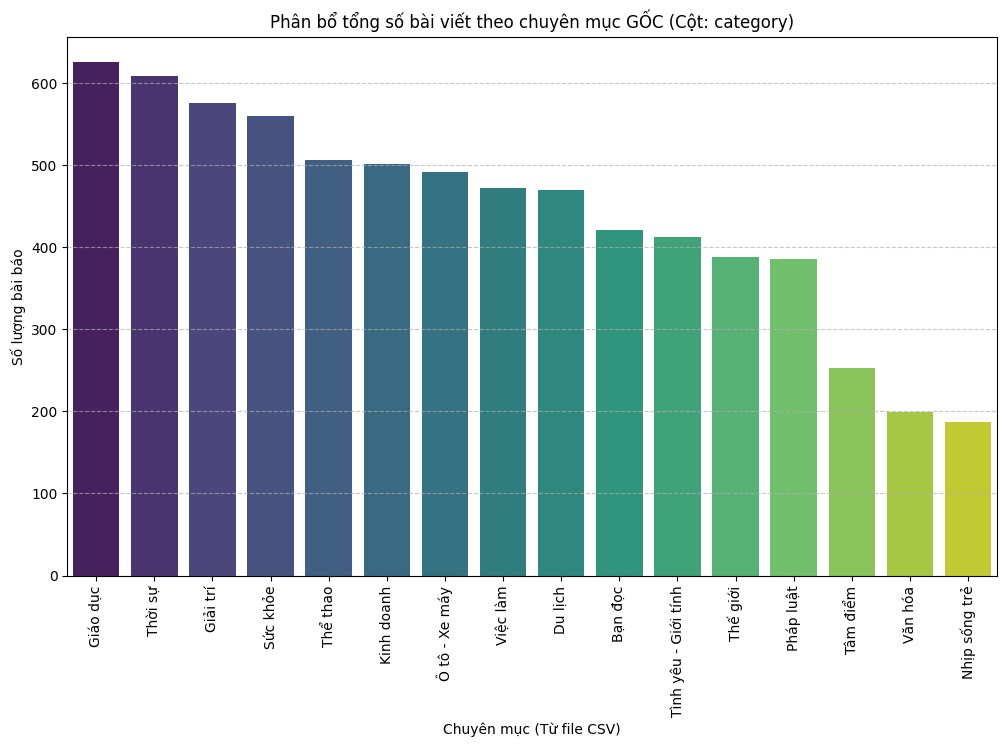

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Giúp biểu đồ đẹp hơn

# --- 1. Tải Dữ liệu ---
DF_PATH = "dantri_qc_grouped.csv"
df = pd.read_csv(DF_PATH)

# !!! THAY ĐỔI DÒNG NÀY !!!
# Thay 'category' bằng tên cột thật của bạn (ví dụ: 'chuyen_muc', 'label', v.v.)
# Nếu bạn không có cột này, bạn không thể chạy code bên dưới.
CATEGORY_COLUMN = 'category' 

# --- 2. Kiểm tra xem cột có tồn tại không ---
if CATEGORY_COLUMN not in df.columns:
    print(f"LỖI: Không tìm thấy cột '{CATEGORY_COLUMN}' trong file CSV.")
    print(f"Các cột hiện có là: {list(df.columns)}")
else:
    print(f"Đang phân tích cột: '{CATEGORY_COLUMN}'...")
    
    # --- 3. Đếm số lượng bài viết cho mỗi chuyên mục ---
    category_counts = df[CATEGORY_COLUMN].value_counts()
    
    print("\n=== PHÂN BỔ DỮ LIỆU GỐC (GROUND TRUTH) ===")
    print(category_counts)

    # --- 4. Vẽ biểu đồ Phân bổ ---
    plt.figure(figsize=(12, 7))
    sns.barplot(
        x=category_counts.index, 
        y=category_counts.values, 
        palette="viridis" # Dùng màu khác
    )
    plt.title(f'Phân bổ tổng số bài viết theo chuyên mục GỐC (Cột: {CATEGORY_COLUMN})')
    plt.xlabel('Chuyên mục (Từ file CSV)')
    plt.ylabel('Số lượng bài báo')
    plt.xticks(rotation=90) # Xoay nhãn cho dễ đọc
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()